## KB부동산 데이터 분석
- 부동산 가격 변화 분석 및 시각화
- 데이터 : https://onland.kbstar.com/quics?page=C059744


In [2]:
import pandas as pd
# pd.read_excel()로 KB부동산 데이터 읽을 수 없음(Error : Workbook is encrypted)
# xlwings를 통해 데이터를 불러옴
import xlwings as xw

In [3]:
wb = xw.Book(r'dataset/KB_ts.xls')
sheet = wb.sheets['매매종합']
row_num = sheet.range((1,1)).end('down').end('down').end('down').row
# 엑셀에서 불러올 데이터 영역 설정.
data_range = 'A2:GE'  + str(row_num)
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value

In [8]:
raw_data.head()

,구분,전국,서울,강북,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,34.6561,30.0438,41.94,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2,34.6561,30.0438,41.8891,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3,34.708,30.0024,41.8891,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
# 지역이 시-도, 구-군, 영어 이름으로 3가지로 되어 있고, 시-도와 구-군은 계층 구조를 이룸.

# 시-도 계층 저장
big_col = list(raw_data.columns)
# 구-군 계층 저장
small_col = list(raw_data.iloc[0])

In [10]:
print(big_col)
print(small_col)

['구분', '전국', '서울', '강북', None, None, None, None, None, None, None, None, None, None, None, None, None, None, '강남', None, None, None, None, None, None, None, None, None, None, None, '6개광역시', '부산', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '대구', None, None, None, None, None, None, None, None, '인천', None, None, None, None, None, None, None, None, '광주', None, None, None, None, None, '대전', None, None, None, None, None, '울산', None, None, None, None, None, '5개광역시\n(인천外)', '수도권', '세종', '경기', '수원', None, None, None, None, '성남', None, None, None, '고양', None, None, None, '안양', None, None, '부천', '의정부', '광명', '평택', '안산', None, None, '과천', '구리', '남양주', '용인', None, None, None, '시흥', '군포', '의왕', '하남', '오산', '파주', '이천', '안성', '김포', '양주', '동두천', '광주', '화성', '강원', '춘천', None, '원주', '충북', '청주', None, None, None, None, '충주', '제천', '충남', '천안', None, None, '공주', '아산', '논산', '계룡', '당진', '서산', '전북', '전주', None, None, '익산', '군산', '전남', '목포', '순천', '광양', '여수'

In [11]:
big_names = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
big_name_list = big_names.split(' ')

for idx, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[idx] = big_col[idx]
    
    check = idx
    while True:
        if big_col[check] in big_name_list:
            big_col[idx] = big_col[check]
            break
        else:
            check = check - 1

In [12]:
print(big_col)
print(small_col)

['구분', '전국', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '6개광역시', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '광주', '광주', '광주', '광주', '광주', '광주', '대전', '대전', '대전', '대전', '대전', '대전', '울산', '울산', '울산', '울산', '울산', '울산', '울산', '수도권', '세종', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '광주', '광주', '강원', '강원', '강원', '강원', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '전북', '전북', '전북', '전북', '전북', '전북', '전남', '전남', '전남', '전남', '전남', '경북', '경북',

In [13]:
# '광주' -> '경기'
big_col[129] = '경기'
big_col[130] = '경기'
# '제주/\n서귀포' -> '서귀포'
small_col[185] = '서귀포'

In [14]:
print(big_col)
print(small_col)

['구분', '전국', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '6개광역시', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '광주', '광주', '광주', '광주', '광주', '광주', '대전', '대전', '대전', '대전', '대전', '대전', '울산', '울산', '울산', '울산', '울산', '울산', '울산', '수도권', '세종', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '강원', '강원', '강원', '강원', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '전북', '전북', '전북', '전북', '전북', '전북', '전남', '전남', '전남', '전남', '전남', '경북', '경북',

In [15]:
raw_data.columns = [big_col, small_col]
raw_data

구분       전국       서울                              \
                 구분       전국       서울              강북         강북구   
0              None     None     None            None         강북구   
1    Classification    Total    Seoul  Northern seoul  Gangbuk-gu   
2              86.1  34.6561  30.0438           41.94        None   
3                 2  34.6561  30.0438         41.8891        None   
4                 3   34.708  30.0024         41.8891        None   
..              ...      ...      ...             ...         ...   
405               8  99.5861  100.682         101.017      102.99   
406               9  99.6396   101.06         101.292     103.051   
407              10  99.7334  101.432          101.53     103.091   
408              11  99.8735  101.848         101.852     103.129   
409              12  100.222   102.56         102.275     103.256   

                                                               ...       경남  \
             광진구       노원구        도봉구           동대문구      마포구  ...      의창구   
0            광진구       노원구        도봉구           동대문구      마포구  ...      의창구   
1    Gwangjin-gu  Nowon-gu  Dobong-gu  Dongdaemun-gu  Mapo-gu  ...  Uichang   
2           None      None       None           None     None  ...     None   
3           None      None       None           None     None  ...     None   
4           None      None       None           None     None  ...     None   
..           ...       ...        ...            ...      ...  ...      ...   
405      100.668       101    100.224        100.984  100.979  ...   96.993   
406      100.877   101.222    100.438        101.329  101.442  ...  96.7089   
407      101.267   101.366    100.562        101.627  101.881  ...  96.4059   
408      101.417   101.588    100.707        102.247   102.13  ...   96.163   
409      101.851   102.107    100.872        102.634  102.641  ...  96.3038   

                                                                제주도  \
         진해구       양산     거제       진주       김해         통영       제주도   
0        진해구     None   None     None     None       None      None   
1     Jinhae  Yangsan  Geoje    Jinju   Gimhae  Tongyoung  Jeju-do    
2       None     None   None     None     None       None      None   
3       None     None   None     None     None       None      None   
4       None     None   None     None     None       None      None   
..       ...      ...    ...      ...      ...        ...       ...   
405  98.8204     None   None  98.4843  95.6924       None      None   
406  98.2978     None   None  98.1888  95.3363       None      None   
407   98.046     None   None  97.9575  94.8948       None      None   
408  97.8812     None   None  97.8769  94.8452       None      None   
409  97.7853     None   None  97.8454  94.9253       None      None   

                                       기타지방  
                 서귀포                   기타지방  
0               None                   None  
1    Jeju/\nSeogwipo  Non-Metropolitan Area  
2               None                   None  
3               None                   None  
4               None                   None  
..               ...                    ...  
405          99.0585                98.0999  
406          98.3358                97.9116  
407           97.879                97.7453  
408          97.3029                97.6022  
409          97.1319                97.5571  

[410 rows x 187 columns]

In [16]:
new_col_data = raw_data.drop([0, 1])

In [17]:
new_col_data.head()

구분       전국       서울                                               ...  \
     구분       전국       서울       강북   강북구   광진구   노원구   도봉구  동대문구   마포구  ...   
2  86.1  34.6561  30.0438    41.94  None  None  None  None  None  None  ...   
3     2  34.6561  30.0438  41.8891  None  None  None  None  None  None  ...   
4     3   34.708  30.0024  41.8891  None  None  None  None  None  None  ...   
5     4  34.4486  29.8366  41.7366  None  None  None  None  None  None  ...   
6     5  34.2929   29.588  41.2791  None  None  None  None  None  None  ...   

     경남                                       제주도        기타지방  
    의창구   진해구    양산    거제    진주    김해    통영   제주도   서귀포  기타지방  
2  None  None  None  None  None  None  None  None  None  None  
3  None  None  None  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None  None  None  None  
5  None  None  None  None  None  None  None  None  None  None  
6  None  None  None  None  None  None  None  None  None  None  

[5 rows x 187 columns]

In [18]:
# 날짜를 python의 datetime type으로 바꿈 -> index 지정
index_list = list(new_col_data['구분']['구분'])
new_index = []

for idx, raw_index in enumerate(index_list):
    tmp = str(raw_index).split('.')
    if int(tmp[0]) > 12:
        if len(tmp[0]) == 2:
            # 19XX년 
            new_index.append('19' + tmp[0] + '.' + tmp[1])
        else:
            # 2000년 이후
            new_index.append(tmp[0] + '.' + tmp[1])
    else:
        # month만 있는 경우
        # 연도 값을 앞 index에서 가져오고, 뒤에 month를 붙임.
        new_index.append(new_index[idx-1].split('.')[0] + '.' + tmp[0])

new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)

In [19]:
cleaned_data.head()

전국       서울                                               \
                 전국       서울       강북   강북구   광진구   노원구   도봉구  동대문구   마포구   
1986-01-01  34.6561  30.0438    41.94  None  None  None  None  None  None   
1986-02-01  34.6561  30.0438  41.8891  None  None  None  None  None  None   
1986-03-01   34.708  30.0024  41.8891  None  None  None  None  None  None   
1986-04-01  34.4486  29.8366  41.7366  None  None  None  None  None  None   
1986-05-01  34.2929   29.588  41.2791  None  None  None  None  None  None   

                  ...    경남                                       제주도        \
            서대문구  ...   의창구   진해구    양산    거제    진주    김해    통영   제주도   서귀포   
1986-01-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-02-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-03-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-04-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-05-01  None  ...  None  None  None  None  None  None  None  None  None   

            기타지방  
            기타지방  
1986-01-01  None  
1986-02-01  None  
1986-03-01  None  
1986-04-01  None  
1986-05-01  None  

[5 rows x 186 columns]

### 위 과정을 함수로 바꾸기

In [20]:
def KBpriceindex_preprocessing(path, sheet_name):
    # path : KB 데이터 엑셀 파일의 경로
    # sheet_name : ‘매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’
    
    wb = xw.Book(path)
    sheet = wb.sheets[sheet_name]
    row_num = sheet.range((1,1)).end('down').end('down').end('down').row
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    
    big_names = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    big_name_list = big_names.split(' ')
    big_col = list(raw_data.columns)

    small_col = list(raw_data.iloc[0])
    for idx, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[idx] = big_col[idx]
        check = idx
        while True:
            if big_col[check] in big_name_list:
                big_col[idx] = big_col[check]
                break
            else:
                check = check - 1
    
    # '광주' -> '경기'
    big_col[129] = '경기'
    big_col[130] = '경기'
    # '제주/\n서귀포' -> '서귀포'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0, 1])
    
    index_list = list(new_col_data['구분']['구분'])
    new_index = []

    for idx, raw_index in enumerate(index_list):
        tmp = str(raw_index).split('.')
        if int(tmp[0]) > 12:
            if len(tmp[0]) == 2:
                # 19XX년 
                new_index.append('19' + tmp[0] + '.' + tmp[1])
            else:
                # 2000년 이후
                new_index.append(tmp[0] + '.' + tmp[1])
        else:
            # month만 있는 경우
            # 연도 값을 앞 index에서 가져오고, 뒤에 month를 붙임.
            new_index.append(new_index[idx-1].split('.')[0] + '.' + tmp[0])
    
    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)
    
    return cleaned_data

In [22]:
# 함수 check
path = 'dataset/KB_ts.xls'
sheet_name = '매매종합'
new_data = KBpriceindex_preprocessing(path, sheet_name)
new_data.head()

전국       서울                                               \
                 전국       서울       강북   강북구   광진구   노원구   도봉구  동대문구   마포구   
1986-01-01  34.6561  30.0438    41.94  None  None  None  None  None  None   
1986-02-01  34.6561  30.0438  41.8891  None  None  None  None  None  None   
1986-03-01   34.708  30.0024  41.8891  None  None  None  None  None  None   
1986-04-01  34.4486  29.8366  41.7366  None  None  None  None  None  None   
1986-05-01  34.2929   29.588  41.2791  None  None  None  None  None  None   

                  ...    경남                                       제주도        \
            서대문구  ...   의창구   진해구    양산    거제    진주    김해    통영   제주도   서귀포   
1986-01-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-02-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-03-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-04-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-05-01  None  ...  None  None  None  None  None  None  None  None  None   

            기타지방  
            기타지방  
1986-01-01  None  
1986-02-01  None  
1986-03-01  None  
1986-04-01  None  
1986-05-01  None  

[5 rows x 186 columns]

---------------
### 시각화

In [23]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
%matplotlib inline

In [24]:
# mac에서 한글 폰트 사용하기
rc('font', family='AppleGothic')
# 마이너스 폰트 깨지는거 방지
rcParams['axes.unicode_minus'] = False

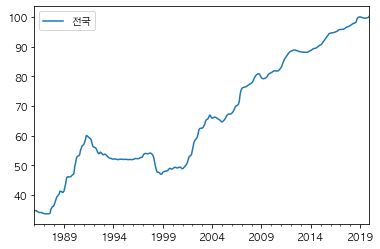

In [25]:
new_data['전국']['전국'].plot(legend='전국')
plt.show()

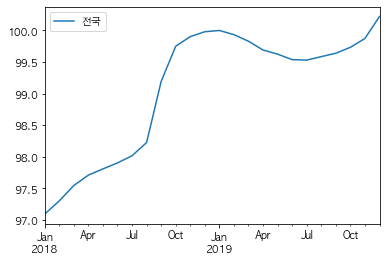

In [26]:
# 2018-01부터 현재까지
new_data['전국']['전국']['2018-01':].plot(legend='전국')
plt.show()

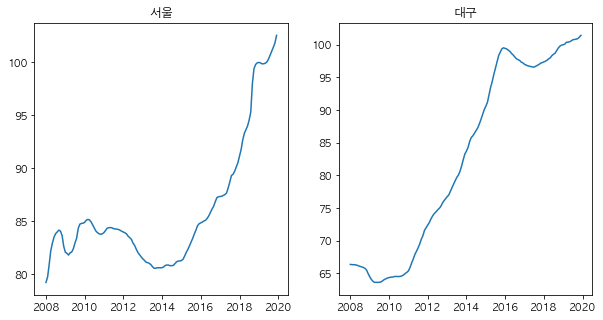

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('서울')
plt.plot(new_data['서울']['서울']['2008-01':])

plt.subplot(1, 2, 2)
plt.title('대구')
plt.plot(new_data['대구']['대구']['2008-01':])

plt.show()

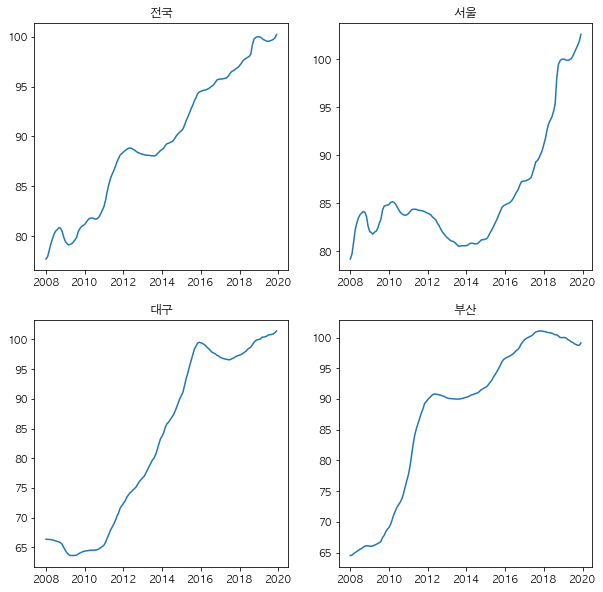

In [28]:
show_list = ['전국', '서울', '대구', '부산']
start_date = '2008-01'
num_row = int((len(show_list) - 1) / 2) + 1

plt.figure(figsize = (10, num_row * 5))
for i , spot in enumerate(show_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_date:])

plt.show()

In [30]:
def visualization(dataframe, spot_list, start_date):
    num_row = int((len(spot_list) - 1) / 2) + 1
    plt.figure(figsize = (10, num_row * 5))
    for i , spot in enumerate(spot_list):
        spot = spot.replace(" ", '')
        plt.subplot(num_row, 2, i+1)
        plt.title(spot)
        if ',' in spot:
            si, gu = spot.split(',')
        else:
            si = gu = spot
        plt.plot(dataframe[si][gu][start_date:])

    plt.show()

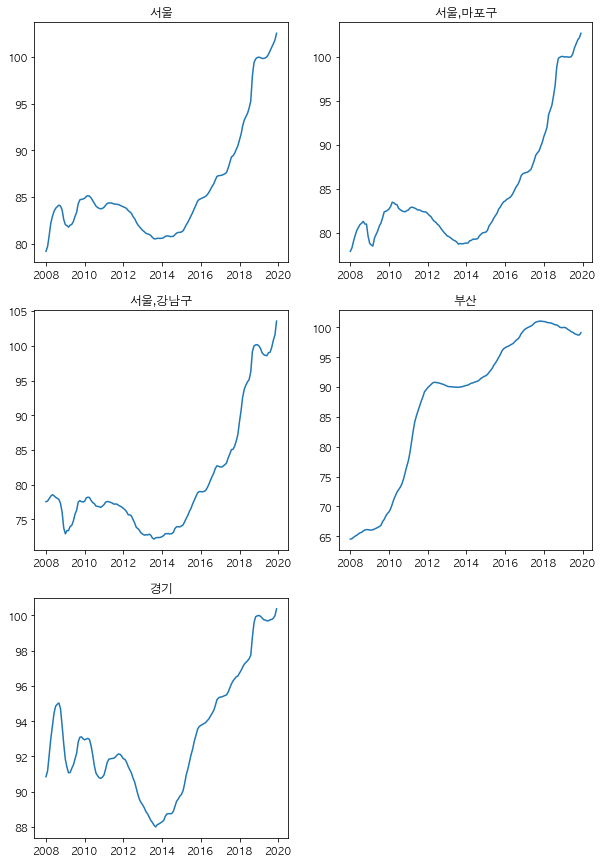

In [31]:
visualization(dataframe = new_data, spot_list = ['서울', '서울, 마포구', '서울, 강남구', '부산', '경기'],
              start_date = '2008-01')

## 부동산 가격지수 증감률
- 지역마다 부동산 가격 변화를 비교

In [76]:
new_data.loc['2018-1-1'] - new_data.loc['2016-01-01']

전국    전국      2.56903
서울    서울      6.32704
      강북      5.42006
      강북구     3.25462
      광진구     5.49141
               ...   
경남    김해     -3.58942
      통영          NaN
제주도   제주도         NaN
      서귀포     3.39709
기타지방  기타지방    -1.1397
Length: 186, dtype: object

In [41]:
# 예시
# 2016년 1월에 투자 -> 2018년 1월 가격 비교
diff = ((new_data.loc['2018-1-1'] - new_data.loc['2016-01-01']) / new_data.loc['2016-01-01'] * 100).dropna()
print("하위 10개") #투자했었을 시 손해
print(diff.sort_values()[:10])
print("")
print("상위 10개") 
print(diff.sort_values(ascending=False)[:10])

하위 10개
경남  성산구   -10.5885
경북  구미    -7.29792
경남  의창구   -6.39471
    창원    -5.33845
경북  북구    -5.08298
경남  진해구   -4.97543
경북  경북    -4.95762
울산  동구    -4.59458
충북  상당구   -4.47669
울산  북구    -4.45814
dtype: object

상위 10개
서울  강남구     12.8312
경기  분당구     11.0664
서울  서초구     10.3545
    송파구     10.2294
    영등포구    10.1712
    성동구     9.57512
    강동구     9.07697
    마포구     8.76415
    강남      8.61713
    양천구     8.28218
dtype: object


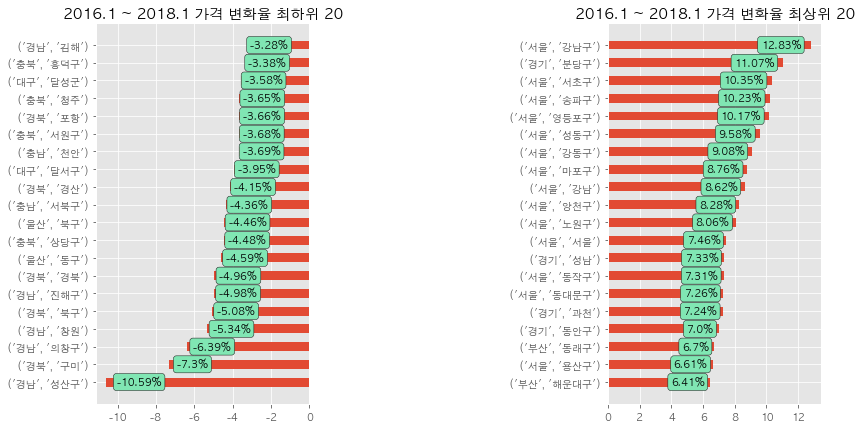

In [42]:
# 위 결과를 시각화
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure(figsize=(13, 7))
ind = np.arange(20)

ax = fig.add_subplot(1 , 3, 1)
plt.title("2016.1 ~ 2018.1 가격 변화율 최하위 20")
rects = plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
           rect.get_y() +rect.get_height()/2.0,
           str(round(diff.sort_values()[:20].values[i], 2)) + '%',
           ha = 'left', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec='0.1'))

ax2 = fig.add_subplot(1, 3, 3)
plt.title("2016.1 ~ 2018.1 가격 변화율 최상위 20")
rects2 = plt.barh(ind, diff.sort_values()[-20:].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[-20:].index)
for i, rect in enumerate(rects2):
    ax2.text(0.95 * rect.get_width(),
           rect.get_y() +rect.get_height()/2.0,
           str(round(diff.sort_values()[-20:].values[i], 2)) + '%',
           ha = 'right', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec='0.1'))
plt.show()

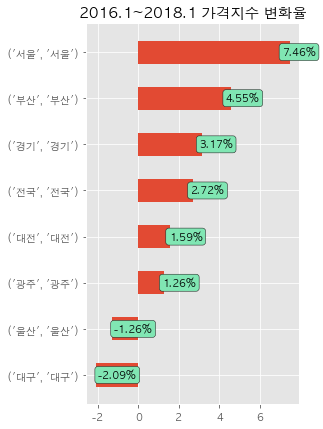

In [146]:
# 특정 지역에 대해 시각화

loca =  '전국 서울 부산 경기 대구 광주 울산 대전'

temp_list = loca.split(" ")
loca_list = []
for temp in temp_list:
    if ',' in temp:
        temp_split = temp.split(",")
        loca_list.append((temp_split[0], temp_split[1]))
    else:
        loca_list.append((temp, temp))

diff = ((new_data.loc['2018-1-1', loca_list] - new_data.loc['2016-1-1', loca_list]) / new_data.loc['2016-1-1', loca_list] * 100).sort_values()

num = len(loca_list)
fig = plt.figure(figsize=(13, 7))
ind = np.arange(num)

ax = fig.add_subplot(1, 3, 1)
plt.title('2016.1~2018.1 가격지수 변화율')
rects = plt.barh(ind, diff.head(num).values,  align='center', height=0.5)
plt.yticks(ind, diff.head(num).index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(round(diff.head(20).values[i], 2)) + '%',
            ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))

plt.show()

In [81]:
new_data.loc[str('2019-01')].shape

(1, 186)

In [82]:
new_data.loc[str('2016-01')].shape

(1, 186)

In [85]:
((new_data.loc['2018-1-1'] - new_data.loc['2016-01-01']))


전국    전국      2.56903
서울    서울      6.32704
      강북      5.42006
      강북구     3.25462
      광진구     5.49141
               ...   
경남    김해     -3.58942
      통영          NaN
제주도   제주도         NaN
      서귀포     3.39709
기타지방  기타지방    -1.1397
Length: 186, dtype: object

In [91]:
new_data.loc[str('2018-01')] - new_data.loc[str('2016-01')]

전국   서울                                          ...   경남       \
             전국   서울   강북  강북구  광진구  노원구  도봉구 동대문구  마포구 서대문구  ...  의창구  진해구   
2016-01-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2018-01-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                     제주도      기타지방  
             양산   거제   진주   김해   통영  제주도  서귀포 기타지방  
2016-01-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-01-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 186 columns]

In [100]:
a = 6
-a

-6

In [103]:
def diff_plot(df, recent_year, past_year, show_location = 10):
    # df : dataframe (index는 python의 datetime type)
    # recent_year : 최근 연도. 'XXXX-XX-XX'로 입력 ex) '2019-01-01'
    # past_year   : 가격 비교를 위한 기준 연도(과거). 'XXXX-XX-XX'로 입력 ex) '2016-01-01'
    # show_location : 보여줄 지역 개수
    
    fig = plt.figure(figsize=(13, 7))
    ind = np.arange(show_location)
    
    ax = fig.add_subplot(1 , 3, 1)
    diff = ((df.loc[(recent_year)] - df.loc[(past_year)]) / df.loc[(past_year)] * 100).dropna()

    plt.title(str(past_year)+"~"+ str(recent_year)+" 가격 변화율 최하위 "+ str(show_location))
    rects = plt.barh(ind, diff.sort_values()[:show_location].values, align='center', height=0.5)
    plt.yticks(ind, diff.sort_values()[:int(show_location)].index)
    for i, rect in enumerate(rects):
        ax.text(0.95 * rect.get_width(),
               rect.get_y() +rect.get_height()/2.0,
               str(round(diff.sort_values()[:show_location].values[i], 2)) + '%',
               ha = 'left', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec='0.1'))

    ax2 = fig.add_subplot(1, 3, 3)
    plt.title(str(past_year)+"~"+ str(recent_year)+" 가격 변화율 최상위 "+str(show_location))
    rects2 = plt.barh(ind, diff.sort_values()[-show_location:].values, align='center', height=0.5)
    plt.yticks(ind, diff.sort_values()[-int(show_location):].index)
    for i, rect in enumerate(rects2):
        ax2.text(0.95 * rect.get_width(),
               rect.get_y() +rect.get_height()/2.0,
               str(round(diff.sort_values()[-(show_location):].values[i], 2)) + '%',
               ha = 'right', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec='0.1'))
    plt.show()

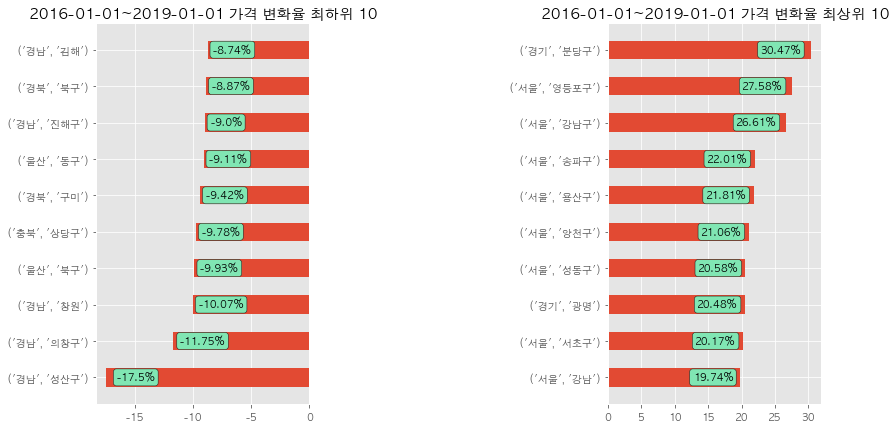

In [104]:
diff_plot(new_data, '2019-01-01', '2016-01-01')

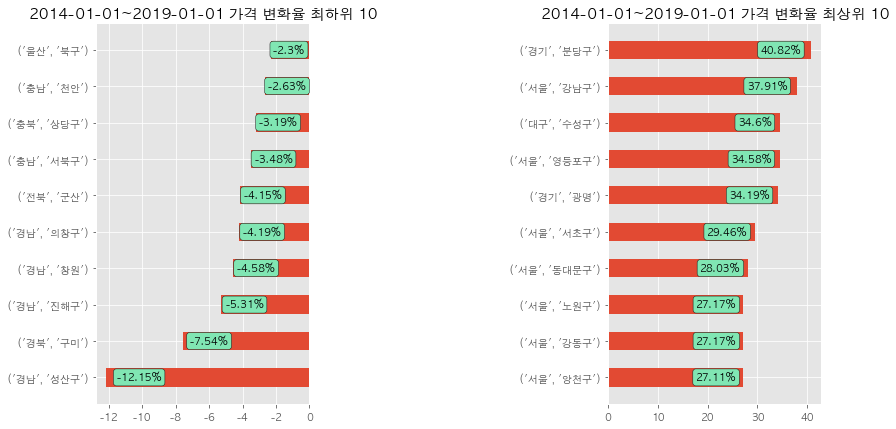

In [105]:
diff_plot(new_data, '2019-01-01', '2014-01-01')

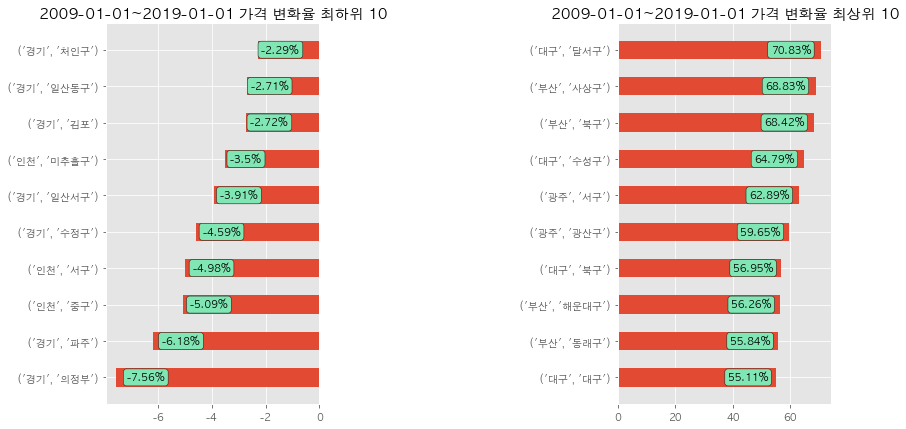

In [106]:
diff_plot(new_data, '2019-01-01', '2009-01-01')